In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta



In [6]:
orders = pd.read_csv("order_data_last_six_month.csv")

In [7]:
orders.head()

,order_date,order_id,order_number,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id
0,03/04/2025,136349,SO/25-26/000818,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,CLOSED,Noida,3
1,30/01/2025,110393,SO/24-25/90881,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,CLOSED,Greater NOIDA,6
2,12/02/2025,116427,SO/24-25/96511,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,CLOSED,Noida,3
3,26/12/2024,96182,SO/24-25/77411,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,CLOSED,Noida,3
4,30/12/2024,97858,SO/24-25/78975,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,CLOSED,Gomti Nagar,1


In [8]:
orders['order_date'] = pd.to_datetime(orders['order_date'], dayfirst=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64459 entries, 0 to 64458
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_date        64459 non-null  datetime64[ns]
 1   order_id          64459 non-null  int64         
 2   order_number      64459 non-null  object        
 3   customer_id       64459 non-null  int64         
 4   customer_name     64459 non-null  object        
 5   poc_name          64459 non-null  object        
 6   poc_id            64459 non-null  int64         
 7   amount            64459 non-null  float64       
 8   discount          64459 non-null  float64       
 9   net_order_amount  64459 non-null  float64       
 10  profit            64459 non-null  float64       
 11  order_status      64459 non-null  object        
 12  warehouse_name    64459 non-null  object        
 13  warehouse_id      64459 non-null  int64         
dtypes: datetime64[ns](1), 

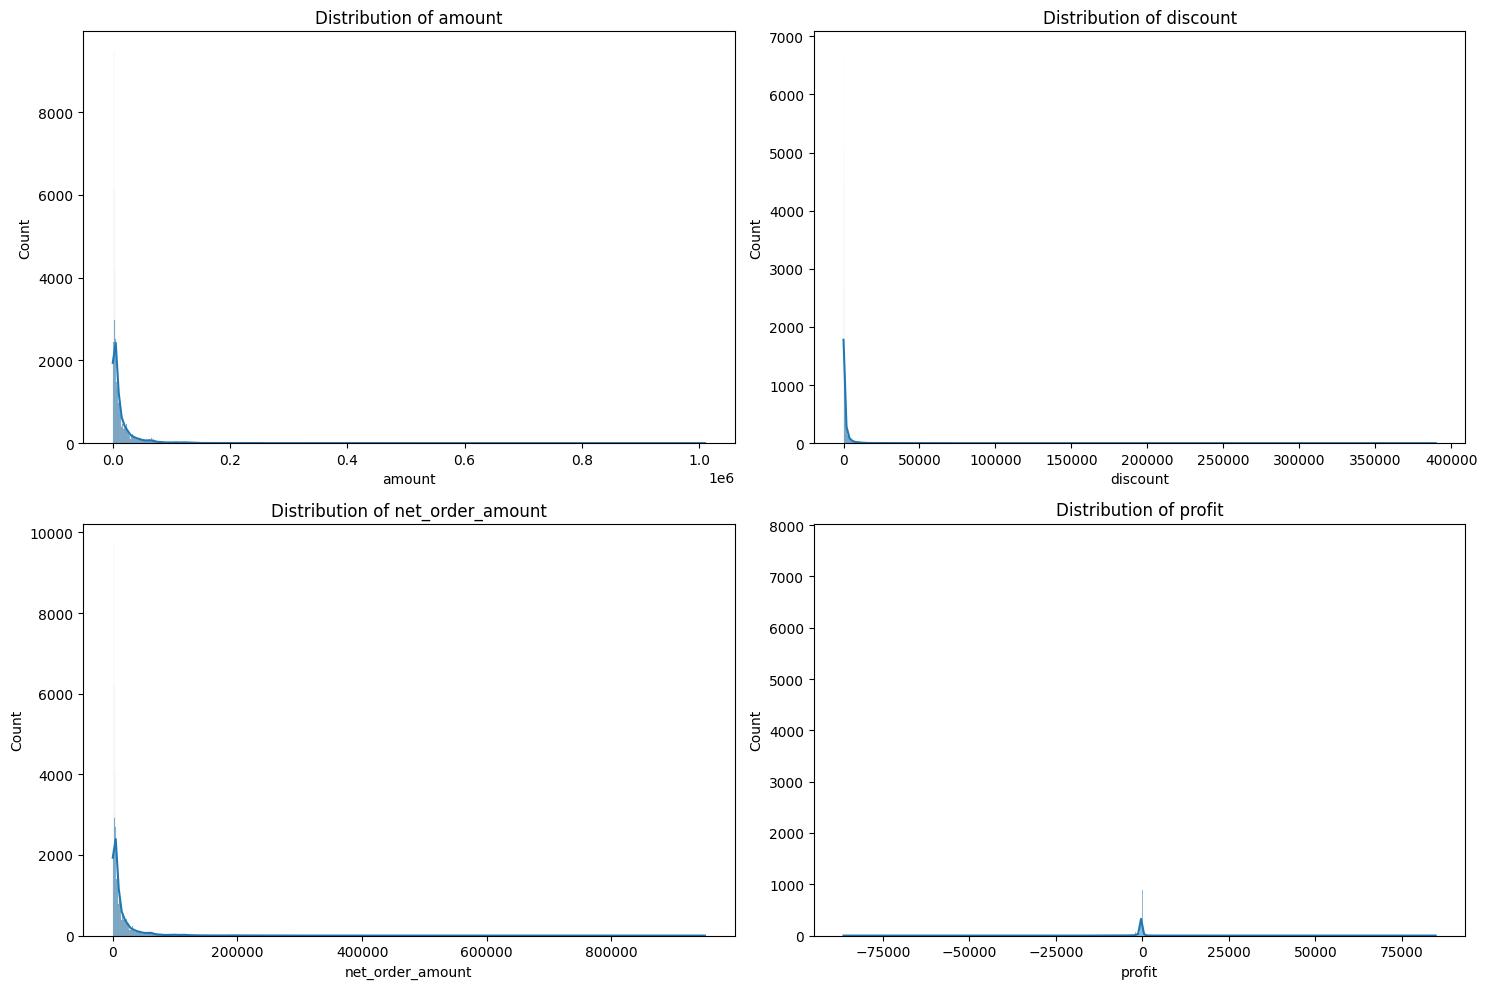

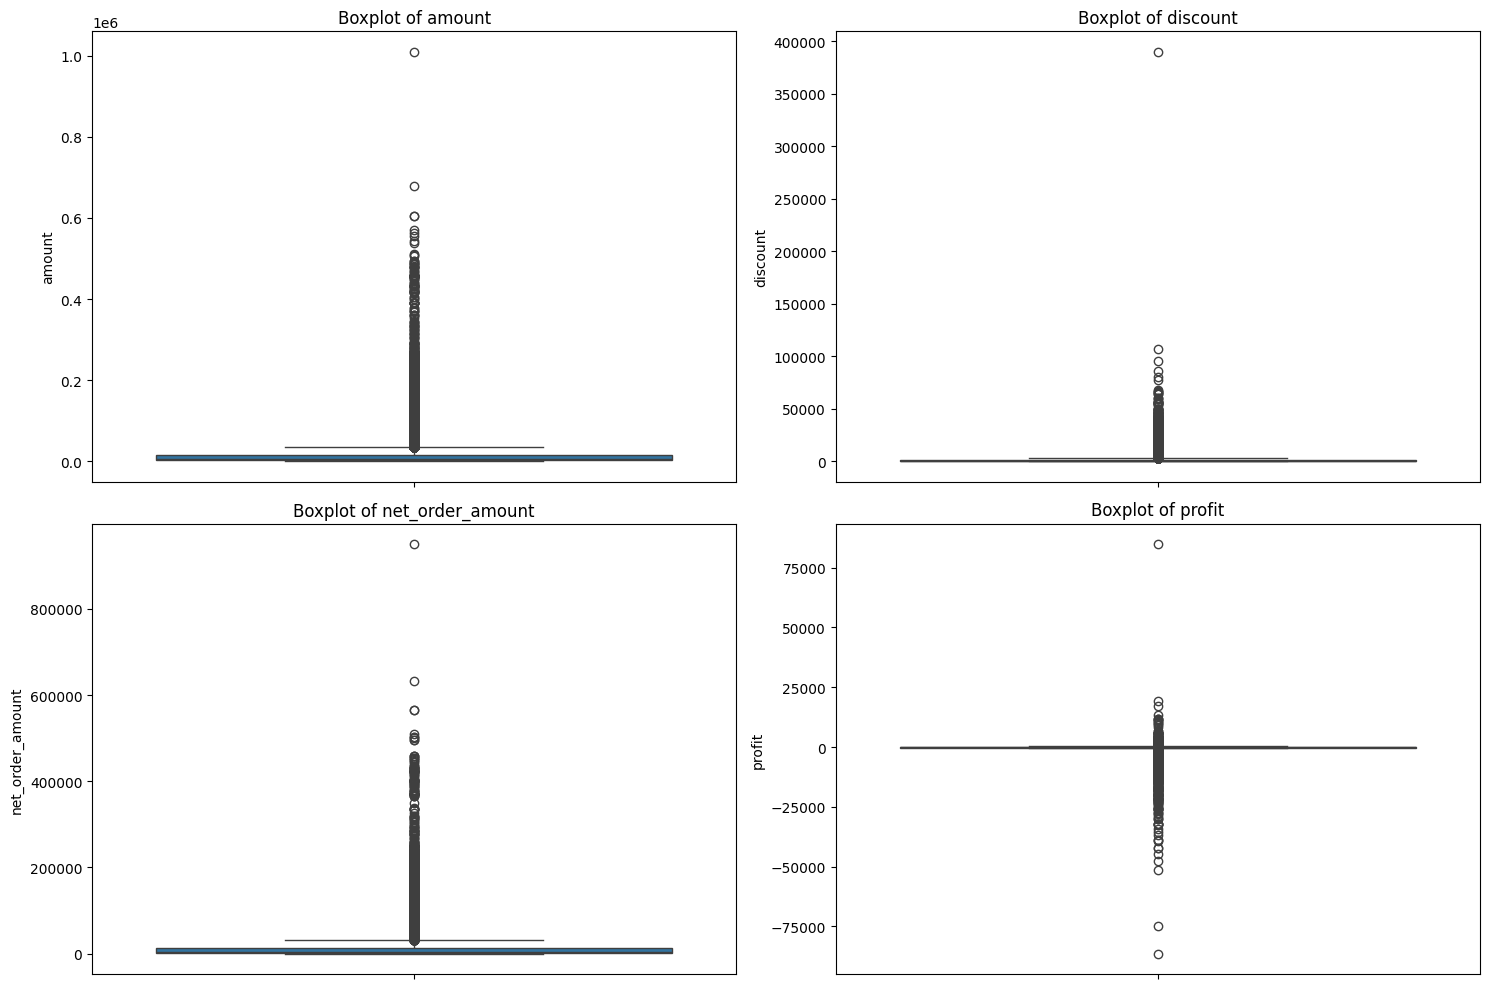


Data shape: (64459, 14)


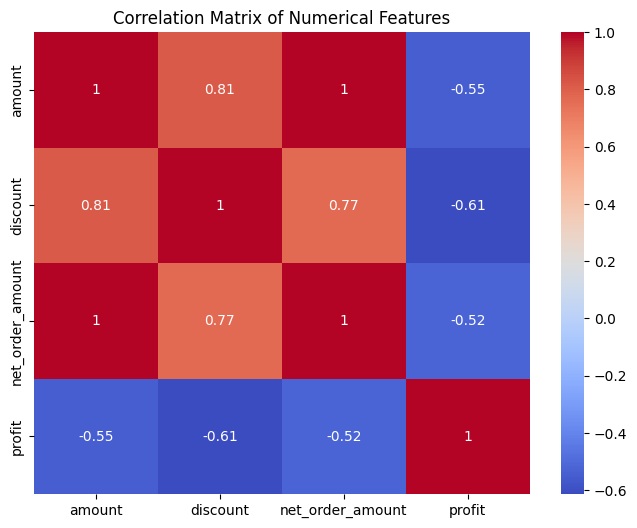


Unique values for categorical features:
order_number: 64459
customer_name: 4093
poc_name: 94
order_status: 2
warehouse_name: 6


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
df=orders
# 1. Examine data types and missing values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# 2. Descriptive statistics
print("\nDescriptive statistics for numerical features:\n", df.describe())

# 3 & 4. Explore key variables and identify potential outliers
numerical_features = ['amount', 'discount', 'net_order_amount', 'profit']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 5. Data Shape
print("\nData shape:", df.shape)

# 6. Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 7. Unique Values
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nUnique values for categorical features:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")

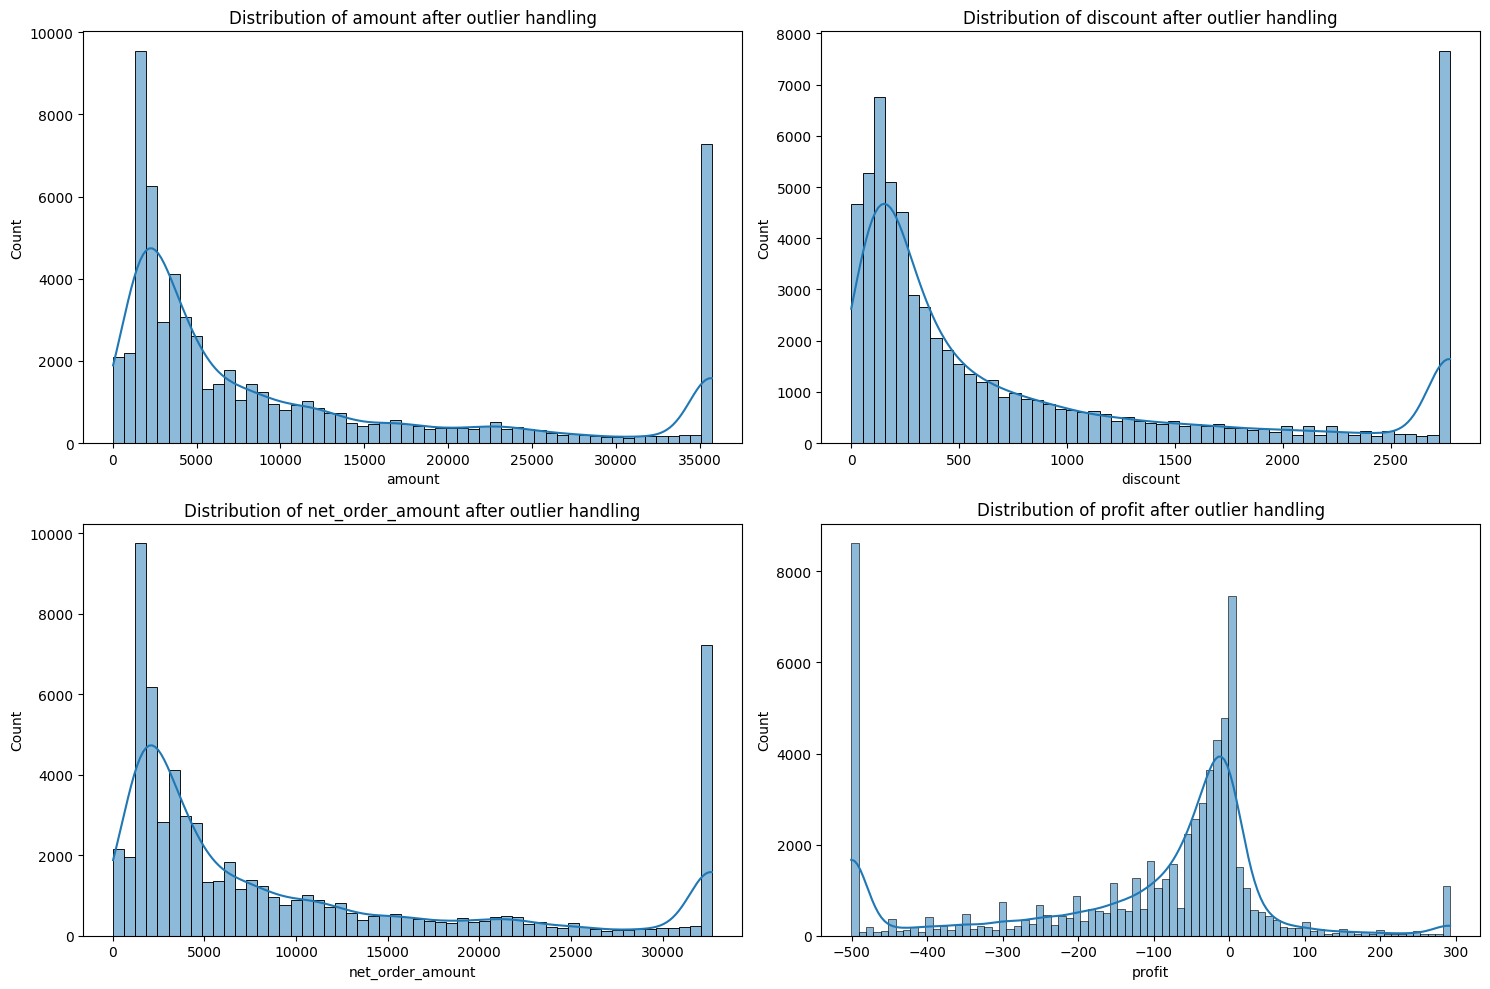

Number of duplicate rows: 0

Descriptive statistics for numerical features after cleaning:
                           order_date       order_id   customer_id  \
count                          64459   64459.000000  64459.000000   
mean   2025-01-10 01:02:21.019873024  103426.837307   4386.190447   
min              2024-09-30 00:00:00   67415.000000      1.000000   
25%              2024-11-28 00:00:00   85413.500000   2355.000000   
50%              2025-01-13 00:00:00  103379.000000   4541.000000   
75%              2025-02-23 00:00:00  121395.500000   6216.000000   
max              2025-04-10 00:00:00  139441.000000   9367.000000   
std                              NaN   20749.791913   2391.437029   

             poc_id        amount      discount  net_order_amount  \
count  64459.000000  64459.000000  64459.000000      64459.000000   
mean    2920.965466  10809.673315    821.837630       9910.472585   
min        2.000000     14.890000      0.000000         14.890000   
25%       

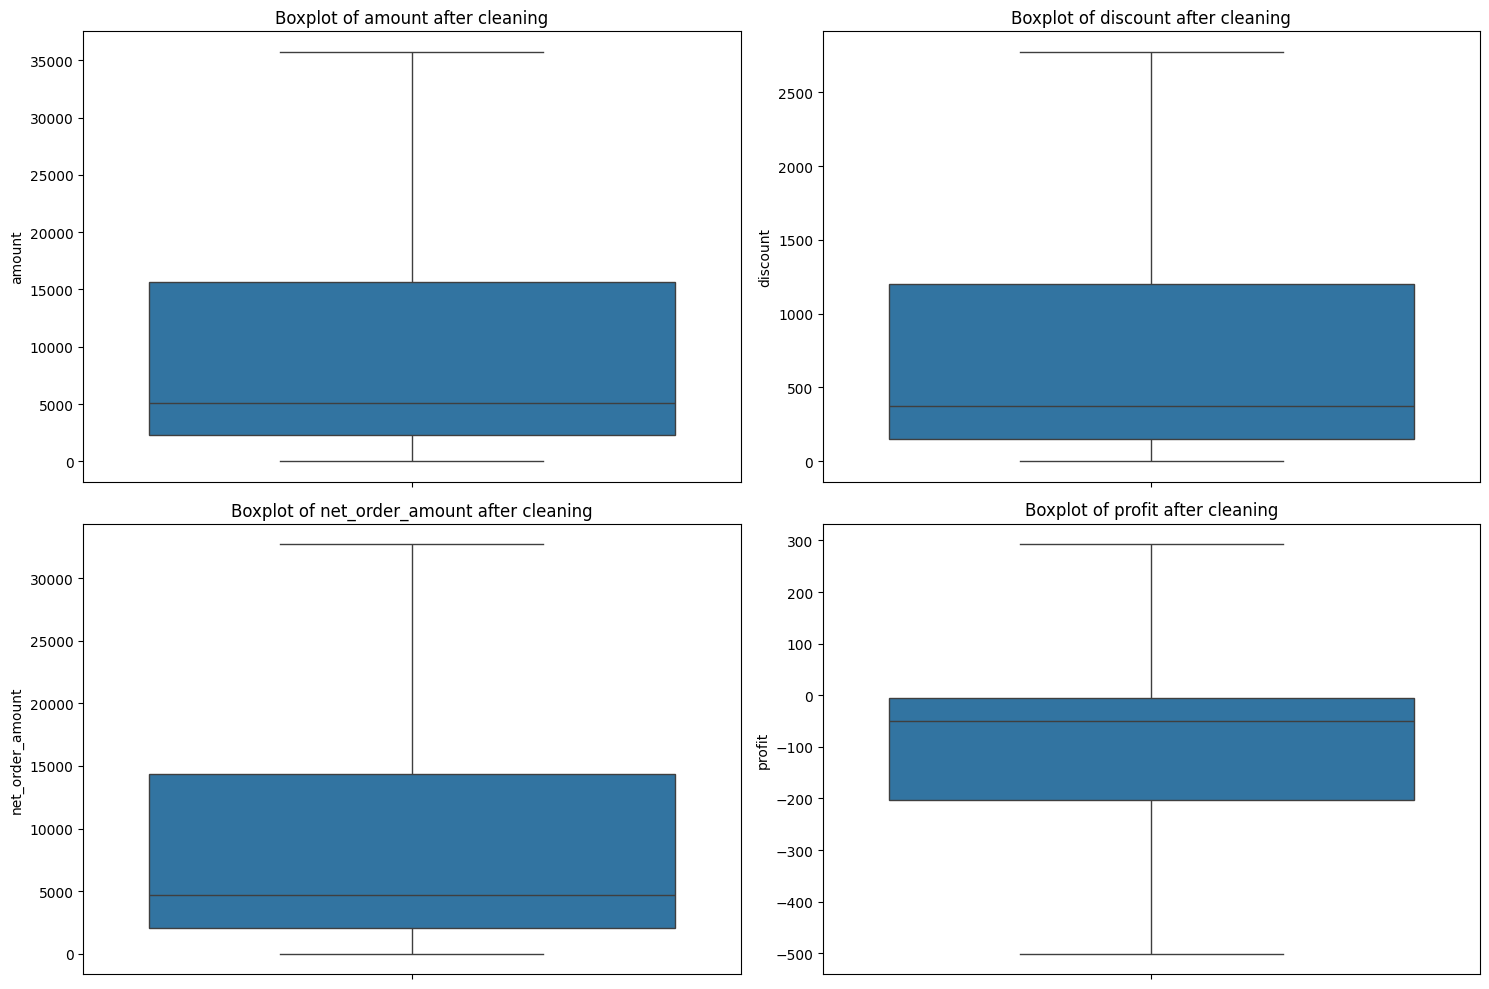


Unique values for categorical features after cleaning:
order_status: 2
warehouse_name: 6
customer_name: 3960
poc_name: 94


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Treatment using IQR method
numerical_features = ['amount', 'discount', 'net_order_amount', 'profit']
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Visualize distributions after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after outlier handling')
plt.tight_layout()
plt.show()

# Data Consistency: Standardize categorical features
categorical_cols = ['order_status', 'warehouse_name', 'customer_name', 'poc_name']
for col in categorical_cols:
    df[col] = df[col].str.lower()  # Convert to lowercase

# Duplicate Removal
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
df.drop_duplicates(inplace=True)

# Verify Cleaning
print("\nDescriptive statistics for numerical features after cleaning:\n", df.describe())

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} after cleaning')
plt.tight_layout()
plt.show()

print("\nUnique values for categorical features after cleaning:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")

In [11]:
daily_orders = (
    orders.groupby(['customer_id', 'order_date'], as_index=False)
    .agg(
        num_orders=('order_id', 'count'),  # or just use 1 if only one row per day is needed
        net_order_amount=('net_order_amount', 'sum'),
        net_profit= ('profit', 'sum')
    )
    .rename(columns={'order_date': 'date'})
)

#unique customers and date range
unique_customers = daily_orders['customer_id'].unique()
min_date = daily_orders['date'].min()
max_date = daily_orders['date'].max()
date_range = pd.date_range(start=min_date, end=max_date+pd.Timedelta(days=1), freq='D')

#cartesian matrix (every customer every date)
customer_df = pd.MultiIndex.from_product(
    [unique_customers, date_range], names=['customer_id', 'date']
).to_frame(index=False)

customer_df = customer_df.merge(daily_orders, on=['customer_id', 'date'], how='left')
customer_df= customer_df.fillna(0)

df_daily=customer_df.copy()
df_daily['order_placed'] = (df_daily['net_order_amount'] > 0).astype(int)
df_daily['day_of_week'] = df_daily['date'].dt.dayofweek
df_daily

,customer_id,date,num_orders,net_order_amount,net_profit,order_placed,day_of_week
0,1,2024-09-30,0.0,0.0,0.0,0,0
1,1,2024-10-01,1.0,4710.0,90.0,1,1
2,1,2024-10-02,0.0,0.0,0.0,0,2
3,1,2024-10-03,0.0,0.0,0.0,0,3
4,1,2024-10-04,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...
807229,9367,2025-04-07,0.0,0.0,0.0,0,0
807230,9367,2025-04-08,0.0,0.0,0.0,0,1
807231,9367,2025-04-09,0.0,0.0,0.0,0,2
807232,9367,2025-04-10,1.0,6000.0,-140.0,1,3


In [12]:
# RFM Features
df_daily['amount_7d'] = df_daily.groupby('customer_id')['net_order_amount'].transform(lambda x: x.rolling(window=7, min_periods=1).sum())
df_daily['amount_30d'] = df_daily.groupby('customer_id')['net_order_amount'].transform(lambda x: x.rolling(window=30, min_periods=1).sum())
df_daily['amount_90d'] = df_daily.groupby('customer_id')['net_order_amount'].transform(lambda x: x.rolling(window=90, min_periods=1).sum())

df_daily['frequency_7d'] = df_daily.groupby('customer_id')['order_placed'].transform(lambda x: x.rolling(window=7, min_periods=1).sum())
df_daily['frequency_30d'] = df_daily.groupby('customer_id')['order_placed'].transform(lambda x: x.rolling(window=30, min_periods=1).sum())
df_daily['frequency_90d'] = df_daily.groupby('customer_id')['order_placed'].transform(lambda x: x.rolling(window=90, min_periods=1).sum())

# Recency is tricky without an actual last order date, so we'll use a placeholder
# and will need to calculate it after more sophisticated data preparation.
df_daily['recency'] = 0  # Placeholder


# Time-Based Features
df_daily['month'] = df_daily['date'].dt.month
df_daily['is_weekend'] = (df_daily['day_of_week'] >= 5).astype(int)

# Rolling Statistics
df_daily['amount_rolling_mean_7d'] = df_daily.groupby('customer_id')['net_order_amount'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df_daily['amount_rolling_mean_30d'] = df_daily.groupby('customer_id')['net_order_amount'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())
df_daily['amount_rolling_mean_90d'] = df_daily.groupby('customer_id')['net_order_amount'].transform(lambda x: x.rolling(window=90, min_periods=1).mean())

df_daily['amount_rolling_std_7d'] = df_daily.groupby('customer_id')['net_order_amount'].transform(lambda x: x.rolling(window=7, min_periods=1).std())
df_daily['amount_rolling_std_30d'] = df_daily.groupby('customer_id')['net_order_amount'].transform(lambda x: x.rolling(window=30, min_periods=1).std())
df_daily['amount_rolling_std_90d'] = df_daily.groupby('customer_id')['net_order_amount'].transform(lambda x: x.rolling(window=90, min_periods=1).std())

# Lagged Features
df_daily['amount_lag_1d'] = df_daily.groupby('customer_id')['net_order_amount'].shift(1)
df_daily['amount_lag_7d'] = df_daily.groupby('customer_id')['net_order_amount'].shift(7)
df_daily['amount_lag_30d'] = df_daily.groupby('customer_id')['net_order_amount'].shift(30)
df_daily['order_placed_lag_1d'] = df_daily.groupby('customer_id')['order_placed'].shift(1)
df_daily['order_placed_lag_7d'] = df_daily.groupby('customer_id')['order_placed'].shift(7)
df_daily['order_placed_lag_30d'] = df_daily.groupby('customer_id')['order_placed'].shift(30)

# Create an empty column to store last order date
df_daily['last_order_date'] = df_daily.groupby('customer_id')\
    .apply(lambda g: g['date'].where(g['order_placed'] == 1).ffill())\
    .reset_index(level=0, drop=True)

# Now calculate recency as the difference in days between current date and last order date
df_daily['recency'] = (df_daily['date'] - df_daily['last_order_date']).dt.days

cols_to_shift = [
    'amount_7d', 'amount_30d', 'amount_90d',
    'frequency_7d', 'frequency_30d', 'frequency_90d','recency',
    'amount_rolling_mean_7d','amount_rolling_mean_30d','amount_rolling_mean_90d',
    'amount_rolling_std_7d','amount_rolling_std_30d','amount_rolling_std_90d'
]

# Shift each column by 1 row within each customer_id group
df_daily[cols_to_shift] = df_daily.groupby('customer_id')[cols_to_shift].shift(1)
df_daily.fillna(0)

df_daily['recency']=df_daily['recency'].fillna(999)
df_daily=df_daily.fillna(0)

df_daily

/var/folders/84/mltdnv9j6hg9vz0nwzb1fl240000gn/T/ipykernel_60460/746935614.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g['date'].where(g['order_placed'] == 1).ffill())\


,customer_id,date,num_orders,net_order_amount,net_profit,order_placed,day_of_week,amount_7d,amount_30d,amount_90d,...,amount_rolling_std_7d,amount_rolling_std_30d,amount_rolling_std_90d,amount_lag_1d,amount_lag_7d,amount_lag_30d,order_placed_lag_1d,order_placed_lag_7d,order_placed_lag_30d,last_order_date
0,1,2024-09-30,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,2024-10-01,1.0,4710.0,90.0,1,1,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-01 00:00:00
2,1,2024-10-02,0.0,0.0,0.0,0,2,4710.0,4710.0,4710.0,...,3330.472939,3330.472939,3330.472939,4710.0,0.0,0.0,1.0,0.0,0.0,2024-10-01 00:00:00
3,1,2024-10-03,0.0,0.0,0.0,0,3,4710.0,4710.0,4710.0,...,2719.319768,2719.319768,2719.319768,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-01 00:00:00
4,1,2024-10-04,0.0,0.0,0.0,0,4,4710.0,4710.0,4710.0,...,2355.000000,2355.000000,2355.000000,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807229,9367,2025-04-07,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
807230,9367,2025-04-08,0.0,0.0,0.0,0,1,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
807231,9367,2025-04-09,0.0,0.0,0.0,0,2,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
807232,9367,2025-04-10,1.0,6000.0,-140.0,1,3,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2025-04-10 00:00:00


In [13]:
df_daily

,customer_id,date,num_orders,net_order_amount,net_profit,order_placed,day_of_week,amount_7d,amount_30d,amount_90d,...,amount_rolling_std_7d,amount_rolling_std_30d,amount_rolling_std_90d,amount_lag_1d,amount_lag_7d,amount_lag_30d,order_placed_lag_1d,order_placed_lag_7d,order_placed_lag_30d,last_order_date
0,1,2024-09-30,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,2024-10-01,1.0,4710.0,90.0,1,1,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-01 00:00:00
2,1,2024-10-02,0.0,0.0,0.0,0,2,4710.0,4710.0,4710.0,...,3330.472939,3330.472939,3330.472939,4710.0,0.0,0.0,1.0,0.0,0.0,2024-10-01 00:00:00
3,1,2024-10-03,0.0,0.0,0.0,0,3,4710.0,4710.0,4710.0,...,2719.319768,2719.319768,2719.319768,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-01 00:00:00
4,1,2024-10-04,0.0,0.0,0.0,0,4,4710.0,4710.0,4710.0,...,2355.000000,2355.000000,2355.000000,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807229,9367,2025-04-07,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
807230,9367,2025-04-08,0.0,0.0,0.0,0,1,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
807231,9367,2025-04-09,0.0,0.0,0.0,0,2,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
807232,9367,2025-04-10,1.0,6000.0,-140.0,1,3,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2025-04-10 00:00:00


In [14]:
pred_df = df_daily.groupby('customer_id', group_keys=False).tail(1)

# Step 2: Remove these rows from df_daily
df_daily = df_daily.drop(pred_df.index)

In [15]:

from sklearn.model_selection import train_test_split


# Define features and target
X = df_daily.drop(columns=['customer_id', 'date','num_orders',	'net_order_amount',	'net_profit', 'order_placed','last_order_date'])
pred_df=pred_df.drop(columns=['date','num_orders',	'net_order_amount',	'net_profit', 'order_placed','last_order_date'])


y = df_daily['order_placed']


# Train/test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=2000,class_weight='balanced')  # increase max_iter if needed

# Train the model
lr.fit(X_train, y_train)

# Predict on train data
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:, 1]

# Predict on test data
y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Logistic Regression")
print("=== TRAIN METRICS ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_prob))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== TEST METRICS ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
=== TRAIN METRICS ===
Accuracy: 0.5925365248838835
ROC-AUC: 0.7807086128246989
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.58      0.72    520546
           1       0.13      0.81      0.23     41605

    accuracy                           0.59    562151
   macro avg       0.55      0.69      0.48    562151
weighted avg       0.91      0.59      0.69    562151


=== TEST METRICS ===
Accuracy: 0.5918411112802137
ROC-AUC: 0.7786726744724333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.58      0.72    134040
           1       0.13      0.81      0.22     10514

    accuracy                           0.59    144554
   macro avg       0.55      0.69      0.47    144554
weighted avg       0.91      0.59      0.69    144554



In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced',random_state=42, max_depth=20,
                             min_samples_split=10, n_estimators=200)
clf.fit(X_train, y_train)

# Predict on train data
y_train_pred = clf.predict(X_train)
y_train_prob = clf.predict_proba(X_train)[:, 1]

# Predict on test data
y_test_pred = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
print("Random Forest Classifier")
print("=== TRAIN METRICS ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_prob))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== TEST METRICS ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Random Forest Classifier
=== TRAIN METRICS ===
Accuracy: 0.9198186964000775
ROC-AUC: 0.940413381333291
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96    520546
           1       0.48      0.82      0.60     41605

    accuracy                           0.92    562151
   macro avg       0.73      0.88      0.78    562151
weighted avg       0.95      0.92      0.93    562151


=== TEST METRICS ===
Accuracy: 0.8746212488066744
ROC-AUC: 0.7894542214024847
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93    134040
           1       0.28      0.44      0.34     10514

    accuracy                           0.87    144554
   macro avg       0.61      0.68      0.64    144554
weighted avg       0.90      0.87      0.89    144554



In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get unique class labels
classes = np.unique(y_train)

# Compute weights
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Convert to list if needed
weights = weights.tolist()
weights

[0.5399628467032692, 6.755810599687537]

In [19]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Optional: If you have categorical columns
categorical_features = ['day_of_week','month']  # Example: ['customer_id', 'day_of_week']

# Initialize CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.001,
    depth=10,
    loss_function='Logloss',
    task_type='CPU',
    devices='0',
    class_weights=[1,10],  # try 1:10 ratio or compute actual ratio
    verbose=100,
    random_seed=42
)


# Train the model
model.fit(
    X_train, y_train,
    eval_set=(X_eval, y_eval),
    early_stopping_rounds=50
)

# Predict on train data
threshold=0.5
y_train_prob = model.predict_proba(X_train)[:, 1]
y_train_pred = (y_train_prob >= threshold).astype(int)
# Predict on test data (already done earlier)
y_test_prob = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= threshold).astype(int)

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Cat Boost Classifier")
print("=== TRAIN METRICS ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_prob))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== TEST METRICS ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))
print("Classification Report:\n", classification_report(y_test, y_test_pred))




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
0:	learn: 0.6928032	test: 0.6928035	best: 0.6928035 (0)	total: 120ms	remaining: 1m 59s
100:	learn: 0.6626192	test: 0.6626371	best: 0.6626371 (100)	total: 6.08s	remaining: 54.1s
200:	learn: 0.6383102	test: 0.6383636	best: 0.6383636 (200)	total: 11.8s	remaining: 46.9s
300:	learn: 0.6187721	test: 0.6188630	best: 0.6188630 (300)	total: 17.1s	remaining: 39.8s
400:	learn: 0.6030009	test: 0.6031560	best: 0.6031560 (400)	total: 22.4s	remaining: 33.5s
500:	learn: 0.5903184	test: 0.5905493	best: 0.5905493 (500)	total: 27.6s	remaining: 27.5s
600:	learn: 0.5799586	test: 0.5802916	best: 0.5802916 (600)	total: 32.8s	remaining: 21.8s
700:	learn: 0.5715272	test: 0.5719631	best: 0.5719631 (700)	total: 38.1s	remaining: 16.2s
800:	learn: 0.5646585	test: 0.5651913	best: 0.5651913 (800)	total: 43.4s	remaining: 10.8s
900:	learn: 0.5589936	test: 0.5596287	best: 0.5596287 (900)	total: 48.5s	remaining

In [20]:
pred_df['Probability of order']=model.predict_proba(pred_df.drop(columns=['customer_id']))[:, 1]
prob_order= pred_df[['customer_id','Probability of order']]
prob_order

,customer_id,Probability of order
193,1,0.584538
387,4,0.377595
581,5,0.405726
775,9,0.385793
969,12,0.402875
...,...,...
806457,9349,0.431878
806651,9350,0.352989
806845,9352,0.418483
807039,9358,0.426119


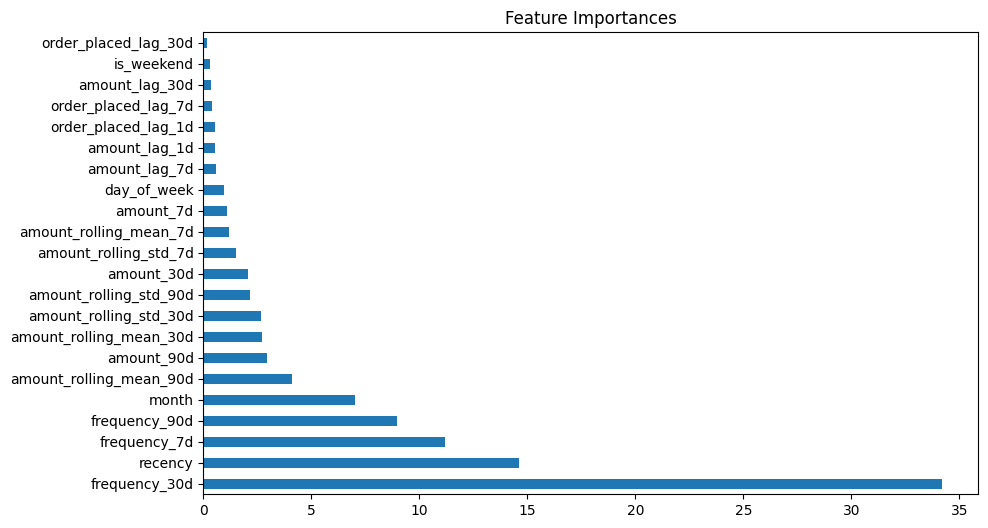

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# After model is trained
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

feat_imp.plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances")
plt.show()


In [22]:
customer_df

,customer_id,date,num_orders,net_order_amount,net_profit
0,1,2024-09-30,0.0,0.0,0.0
1,1,2024-10-01,1.0,4710.0,90.0
2,1,2024-10-02,0.0,0.0,0.0
3,1,2024-10-03,0.0,0.0,0.0
4,1,2024-10-04,0.0,0.0,0.0
...,...,...,...,...,...
807229,9367,2025-04-07,0.0,0.0,0.0
807230,9367,2025-04-08,0.0,0.0,0.0
807231,9367,2025-04-09,0.0,0.0,0.0
807232,9367,2025-04-10,1.0,6000.0,-140.0


In [23]:
X.columns


Index(['day_of_week', 'amount_7d', 'amount_30d', 'amount_90d', 'frequency_7d',
       'frequency_30d', 'frequency_90d', 'recency', 'month', 'is_weekend',
       'amount_rolling_mean_7d', 'amount_rolling_mean_30d',
       'amount_rolling_mean_90d', 'amount_rolling_std_7d',
       'amount_rolling_std_30d', 'amount_rolling_std_90d', 'amount_lag_1d',
       'amount_lag_7d', 'amount_lag_30d', 'order_placed_lag_1d',
       'order_placed_lag_7d', 'order_placed_lag_30d'],
      dtype='object')

In [24]:
sequence_length = 30  # e.g. last 30 days per customer

# List of features to include in the RNN
feature_cols = ['day_of_week', 'amount_7d', 'amount_30d', 'amount_90d', 'frequency_7d',
       'frequency_30d', 'frequency_90d', 'recency', 'month', 'is_weekend',
       'amount_rolling_mean_7d', 'amount_rolling_mean_30d',
       'amount_rolling_mean_90d', 'amount_rolling_std_7d',
       'amount_rolling_std_30d', 'amount_rolling_std_90d', 'amount_lag_1d',
       'amount_lag_7d', 'amount_lag_30d', 'order_placed_lag_1d',
       'order_placed_lag_7d', 'order_placed_lag_30d']

# Step 1: Sort data by customer_id and date
# daily_df = customer_df.sort_values(['customer_id', 'date'])

# Step 2: Group by customer and slide window
X = []
y = []

for cust_id, group in df_daily.groupby('customer_id'):
    group = group.reset_index(drop=True)
    for i in range(sequence_length, len(group)):
        X.append(group.loc[i-sequence_length:i-1, feature_cols].values)
        y.append(group.loc[i, 'order_placed'] > 0)  # target: did they order today

X = np.array(X)
y = np.array(y).astype(int)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.callbacks import EarlyStopping

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Compute class weights
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: cw[0], 1: cw[1]}

# --------------------------------------
# 2. Define RNN model
# --------------------------------------

model = Sequential([
    Masking(mask_value=0., input_shape=(X.shape[1], X.shape[2])),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC()])

# --------------------------------------
# 3. Train
# --------------------------------------

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2,
          class_weight=class_weights, callbacks=[early_stop], verbose=1)

# --------------------------------------
# 4. Predict & Threshold Tuning
# --------------------------------------

y_train_probs = model.predict(X_train)
y_test_probs = model.predict(X_test)

# Precision-recall curve for threshold tuning
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.title("Precision-Recall vs Threshold")
plt.show()

# Try a lower threshold
threshold = 0.4
y_train_pred = (y_train_probs > threshold).astype(int)
y_test_pred = (y_test_probs > threshold).astype(int)

# --------------------------------------
# 5. Evaluation
# --------------------------------------

print("=== TRAIN METRICS ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_probs))
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n=== TEST METRICS ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_probs))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - accuracy: 0.6084 - auc: 0.7128 - loss: 0.6206 - val_accuracy: 0.6501 - val_auc: 0.7786 - val_loss: 0.5624
Epoch 2/10
1991/3392 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.6254 - auc: 0.7487 - loss: 0.5903

KeyboardInterrupt: 